In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [412]:
df = pd.read_csv("heart.csv", index_col=0)

In [413]:
df.head(15)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140.0,289.0,NaN,Normal,172.0,NaN,0.0,Up,0.0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37.0,M,ATA,130.0,283.0,NaN,NaN,98.0,N,0.0,Up,0.0
3,48.0,F,ASY,138.0,214.0,NaN,NaN,108.0,Y,1.5,NaN,NaN
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0.0
5,39.0,M,NAP,120.0,NaN,0.0,Normal,170.0,N,0.0,Up,0.0
6,45.0,F,ATA,130.0,237.0,NaN,NaN,170.0,N,0.0,Up,0.0
7,54.0,M,ATA,110.0,208.0,0.0,Normal,142.0,N,0.0,Up,0.0
8,37.0,NaN,ASY,140.0,207.0,0.0,Normal,130.0,Y,1.5,NaN,1.0
9,48.0,F,ATA,120.0,284.0,0.0,Normal,120.0,N,0.0,Up,0.0


In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             845 non-null    float64
 1   Sex             826 non-null    object 
 2   ChestPainType   845 non-null    object 
 3   RestingBP       881 non-null    float64
 4   Cholesterol     826 non-null    float64
 5   FastingBS       872 non-null    float64
 6   RestingECG      872 non-null    object 
 7   MaxHR           845 non-null    float64
 8   ExerciseAngina  881 non-null    object 
 9   Oldpeak         845 non-null    float64
 10  ST_Slope        845 non-null    object 
 11  HeartDisease    872 non-null    float64
dtypes: float64(7), object(5)
memory usage: 93.2+ KB


In [415]:
df.isnull().sum()

Age               73
Sex               92
ChestPainType     73
RestingBP         37
Cholesterol       92
FastingBS         46
RestingECG        46
MaxHR             73
ExerciseAngina    37
Oldpeak           73
ST_Slope          73
HeartDisease      46
dtype: int64

In [416]:
df.shape

(918, 12)

In [417]:
df["HeartDisease"].value_counts()

1.0    471
0.0    401
Name: HeartDisease, dtype: int64

In [418]:
df.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Age,845.0,53.427219,9.391862,28.0,47.0,54.0,60.0,77.0
RestingBP,881.0,132.393871,18.405111,0.0,120.0,130.0,140.0,200.0
Cholesterol,826.0,200.669492,108.272041,0.0,177.0,224.0,267.0,603.0
FastingBS,872.0,0.232798,0.422857,0.0,0.0,0.0,0.0,1.0
MaxHR,845.0,136.919527,25.510581,60.0,120.0,138.0,156.0,202.0
Oldpeak,845.0,0.886982,1.053743,-2.6,0.0,0.6,1.5,6.2
HeartDisease,872.0,0.540138,0.498672,0.0,0.0,1.0,1.0,1.0


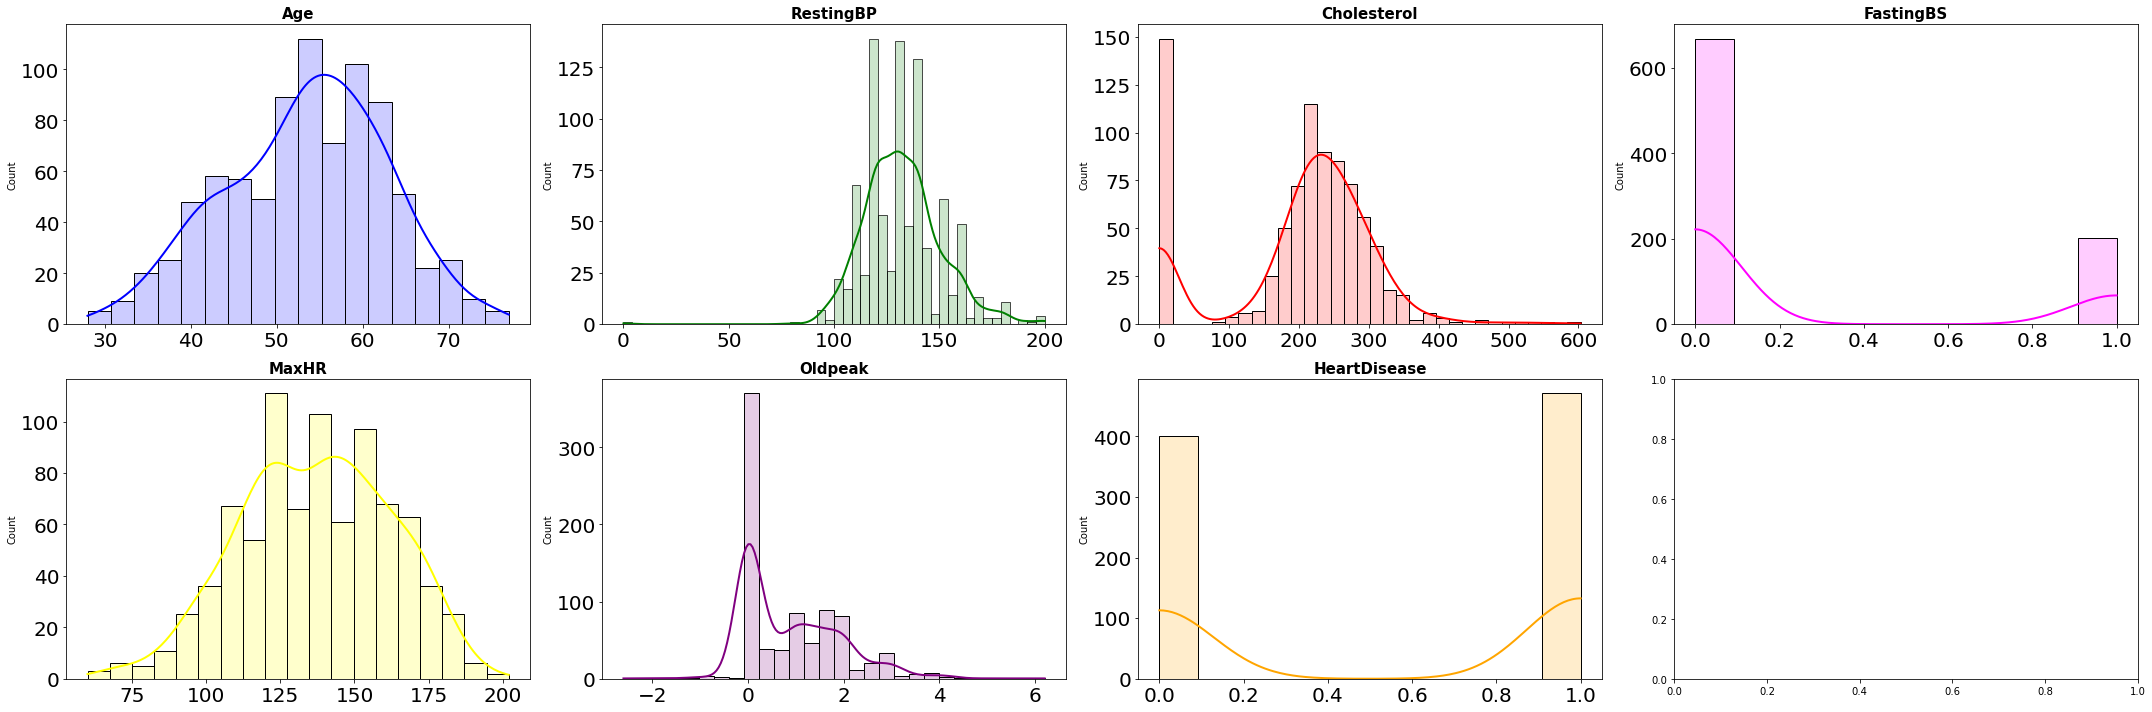

In [419]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "magenta", "yellow", "purple", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();


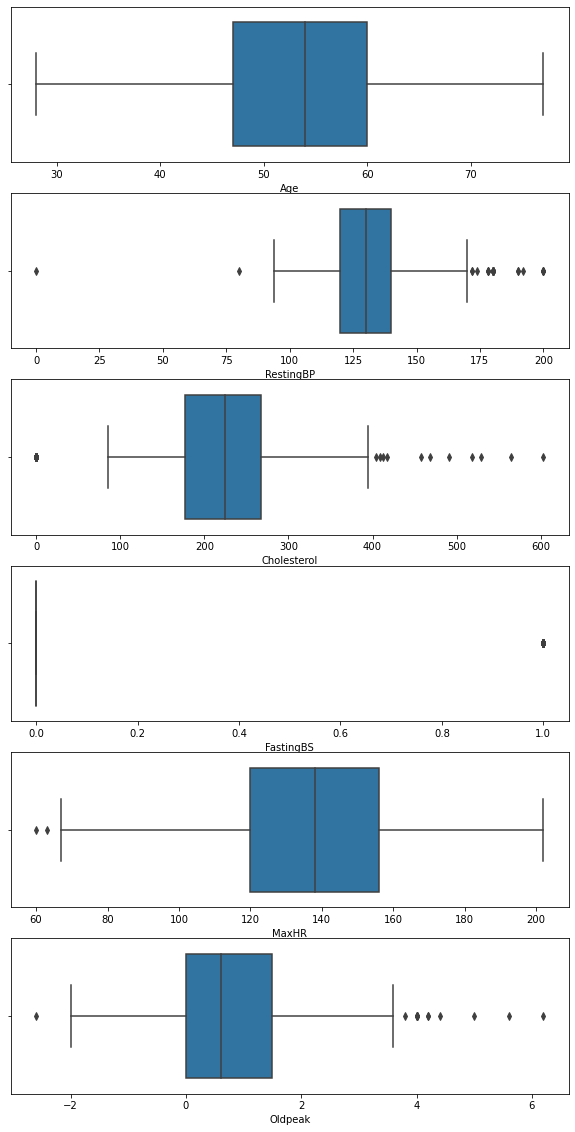

In [420]:
df_numericas = df.select_dtypes(include=np.number)
df_numericas = df_numericas.drop("HeartDisease",axis=1)
fig, ax = plt.subplots(6, 1, figsize=(10,20))
for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

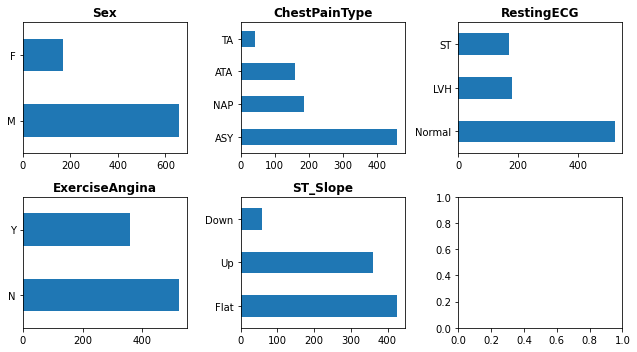

In [421]:
fig, axes = plt.subplots(2, 3, figsize = (9,5))

axes = axes.flat

columnas_object = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout();

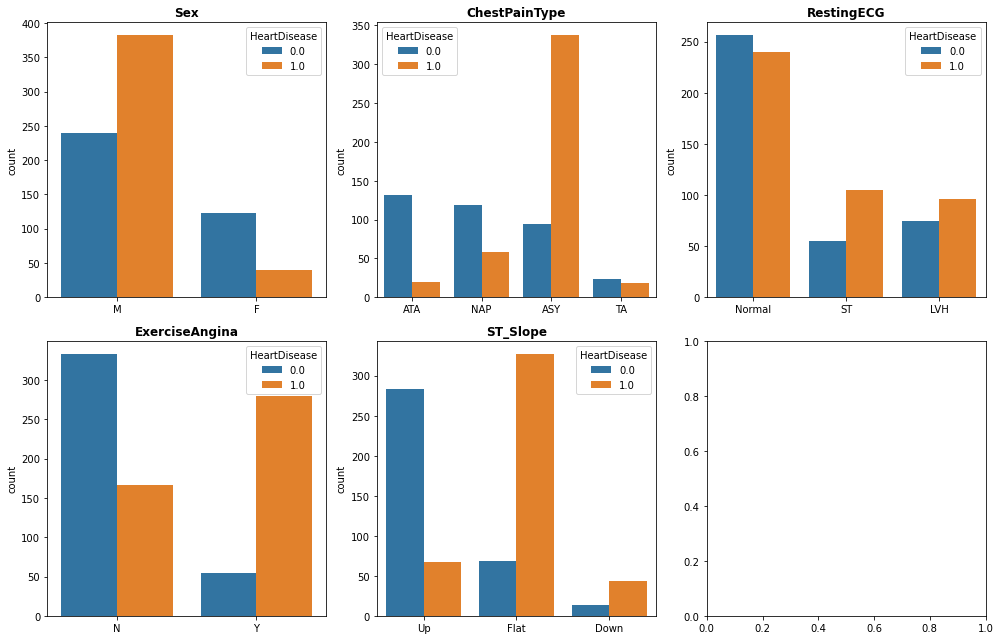

In [422]:
fig, axes = plt.subplots(2, 3, figsize = (14,9))

axes = axes.flat

columnas_object = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    sns.countplot(data=df, x=colum, hue='HeartDisease', ax=axes[i])
    axes[i].set_title(colum, fontsize=12, fontweight='bold')
    axes[i].tick_params(labelsize=10)
    axes[i].set_xlabel("")
    
fig.tight_layout();

<AxesSubplot:xlabel='FastingBS', ylabel='count'>

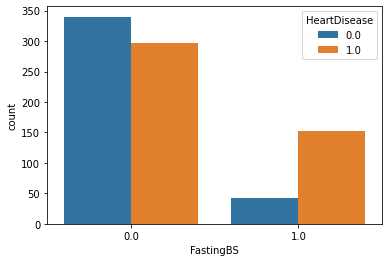

In [423]:
sns.countplot(data=df, x='FastingBS', hue='HeartDisease')


In [424]:
df_hombres = df[df["Sex"] == "M"]
df_hombres = df_hombres.drop("Sex", axis=1)

In [425]:
df_mujeres = df[df["Sex"] != "M"]
df_mujeres = df_mujeres.drop("Sex", axis=1)

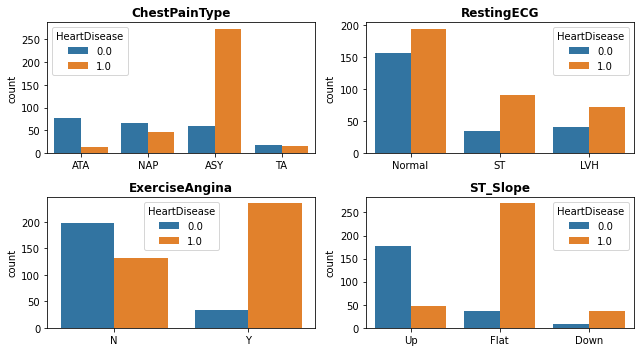

In [426]:
fig, axes = plt.subplots(2, 2, figsize = (9,5))

axes = axes.flat

columnas_object = df_hombres.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    sns.countplot(data=df_hombres, x=colum, hue='HeartDisease', ax=axes[i])
    axes[i].set_title(colum, fontsize=12, fontweight='bold')
    axes[i].tick_params(labelsize=10)
    axes[i].set_xlabel("")
    
fig.tight_layout();

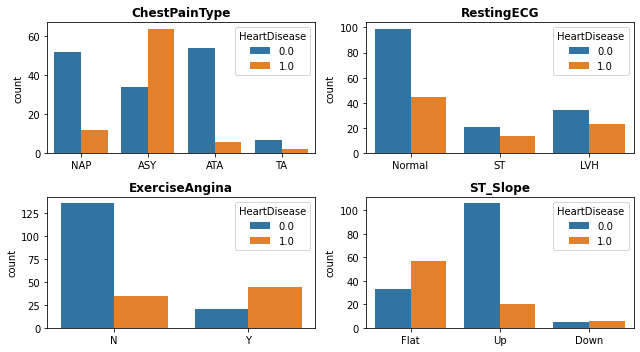

In [427]:
fig, axes = plt.subplots(2, 2, figsize = (9,5))

axes = axes.flat

columnas_object = df_mujeres.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    sns.countplot(data=df_mujeres, x=colum, hue='HeartDisease', ax=axes[i])
    axes[i].set_title(colum, fontsize=12, fontweight='bold')
    axes[i].tick_params(labelsize=10)
    axes[i].set_xlabel("")
    
fig.tight_layout();

<AxesSubplot:xlabel='FastingBS', ylabel='count'>

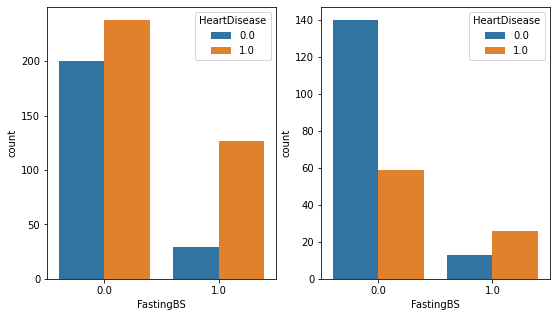

In [428]:
fig, axes = plt.subplots(1, 2, figsize = (9,5))

axes = axes.flat

sns.countplot(data=df_hombres, x='FastingBS', hue='HeartDisease', ax=axes[0])
sns.countplot(data=df_mujeres, x='FastingBS', hue='HeartDisease', ax=axes[1])

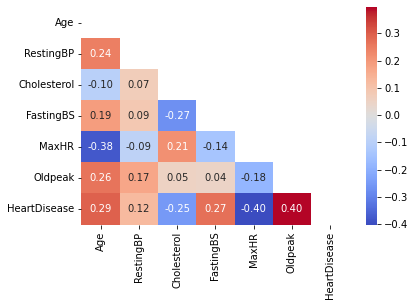

In [429]:
# calculate correlation matrix
corr_matrix = df.corr()

# create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# plot correlation matrix using a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', mask=mask)

# display the plot
plt.show()

# Gestion nulos

In [430]:
df.isnull().sum() / df.shape[1]

Age               6.083333
Sex               7.666667
ChestPainType     6.083333
RestingBP         3.083333
Cholesterol       7.666667
FastingBS         3.833333
RestingECG        3.833333
MaxHR             6.083333
ExerciseAngina    3.083333
Oldpeak           6.083333
ST_Slope          6.083333
HeartDisease      3.833333
dtype: float64

In [431]:
df_numericas = df.select_dtypes(include = np.number)

In [432]:
df_numericas.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,NaN,140.0,289.0,NaN,172.0,0.0,0.0
1,49.0,160.0,180.0,0.0,156.0,1.0,1.0
2,37.0,130.0,283.0,NaN,98.0,0.0,0.0
3,48.0,138.0,214.0,NaN,108.0,1.5,NaN
4,54.0,150.0,195.0,0.0,122.0,0.0,0.0


In [433]:
df_numericas.drop(["HeartDisease", "FastingBS"], axis=1, inplace=True)

In [434]:
imputer = IterativeImputer()
imputer.fit(df_numericas)
imputer.transform(df_numericas)

array([[ 48.04994157, 140.        , 289.        , 172.        ,
          0.        ],
       [ 49.        , 160.        , 180.        , 156.        ,
          1.        ],
       [ 37.        , 130.        , 283.        ,  98.        ,
          0.        ],
       ...,
       [ 57.        , 130.        , 131.        , 115.        ,
          1.2       ],
       [ 57.        , 130.        , 236.        , 174.        ,
          0.        ],
       [ 48.21502774, 138.        , 175.        , 173.        ,
          0.        ]])

In [435]:
numericas_trans = pd.DataFrame(imputer.transform(df_numericas), columns = df_numericas.columns)
numericas_trans.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,48.049942,140.0,289.0,172.0,0.0
1,49.000000,160.0,180.0,156.0,1.0
2,37.000000,130.0,283.0,98.0,0.0
3,48.000000,138.0,214.0,108.0,1.5
4,54.000000,150.0,195.0,122.0,0.0


In [436]:
columnas = numericas_trans.columns
df_num = df.drop(columnas, axis = 1)


In [437]:
df_num[columnas] = numericas_trans
df_num.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,M,ATA,NaN,Normal,NaN,Up,0.0,48.049942,140.0,289.0,172.0,0.0
1,F,NAP,0.0,Normal,N,Flat,1.0,49.000000,160.0,180.0,156.0,1.0
2,M,ATA,NaN,NaN,N,Up,0.0,37.000000,130.0,283.0,98.0,0.0
3,F,ASY,NaN,NaN,Y,NaN,NaN,48.000000,138.0,214.0,108.0,1.5
4,M,NAP,0.0,Normal,N,Up,0.0,54.000000,150.0,195.0,122.0,0.0


In [438]:
# df = df.fillna("Desconocido") 

In [441]:
df_num.isnull().sum()

Sex               92
ChestPainType     73
FastingBS         46
RestingECG        46
ExerciseAngina    37
ST_Slope          73
HeartDisease      46
Age                0
RestingBP          0
Cholesterol        0
MaxHR              0
Oldpeak            0
dtype: int64

In [445]:
df_num["ChestPainType"].fillna("ASY", inplace =True)

In [446]:
df_num.isnull().sum()

Sex               92
ChestPainType      0
FastingBS         46
RestingECG        46
ExerciseAngina    37
ST_Slope          73
HeartDisease      46
Age                0
RestingBP          0
Cholesterol        0
MaxHR              0
Oldpeak            0
dtype: int64

In [468]:
df_num["RestingECG"].fillna("Normal", inplace =True)
df_num["ST_Slope"].fillna("Flat", inplace =True)
df_num["FastingBS"].fillna(0, inplace =True)
df_num["Sex"].fillna("M", inplace =True)


In [469]:
df_num.isnull().sum()

Sex                0
ChestPainType      0
FastingBS          0
RestingECG         0
ExerciseAngina    37
ST_Slope           0
HeartDisease      46
Age                0
RestingBP          0
Cholesterol        0
MaxHR              0
Oldpeak            0
dtype: int64

In [467]:
df_num["Sex"].value_counts()

M    657
F    169
Name: Sex, dtype: int64

In [455]:
df_num.shape

(918, 12)

In [471]:
df_sin_null = df_num.dropna()

In [472]:
df_sin_null.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
1,F,NAP,0.0,Normal,N,Flat,1.0,49.0,160.0,180.000000,156.0,1.0
2,M,ATA,0.0,Normal,N,Up,0.0,37.0,130.0,283.000000,98.0,0.0
4,M,NAP,0.0,Normal,N,Up,0.0,54.0,150.0,195.000000,122.0,0.0
5,M,NAP,0.0,Normal,N,Up,0.0,39.0,120.0,230.735027,170.0,0.0
6,F,ATA,0.0,Normal,N,Up,0.0,45.0,130.0,237.000000,170.0,0.0


In [473]:
df_sin_null.isnull().sum()

Sex               0
ChestPainType     0
FastingBS         0
RestingECG        0
ExerciseAngina    0
ST_Slope          0
HeartDisease      0
Age               0
RestingBP         0
Cholesterol       0
MaxHR             0
Oldpeak           0
dtype: int64

# Gestion de outliers

In [482]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [476]:
df_numericas2 = df_sin_null.select_dtypes(include = np.number)

In [478]:
df_numericas2.drop(["HeartDisease", "FastingBS"], axis=1, inplace=True)

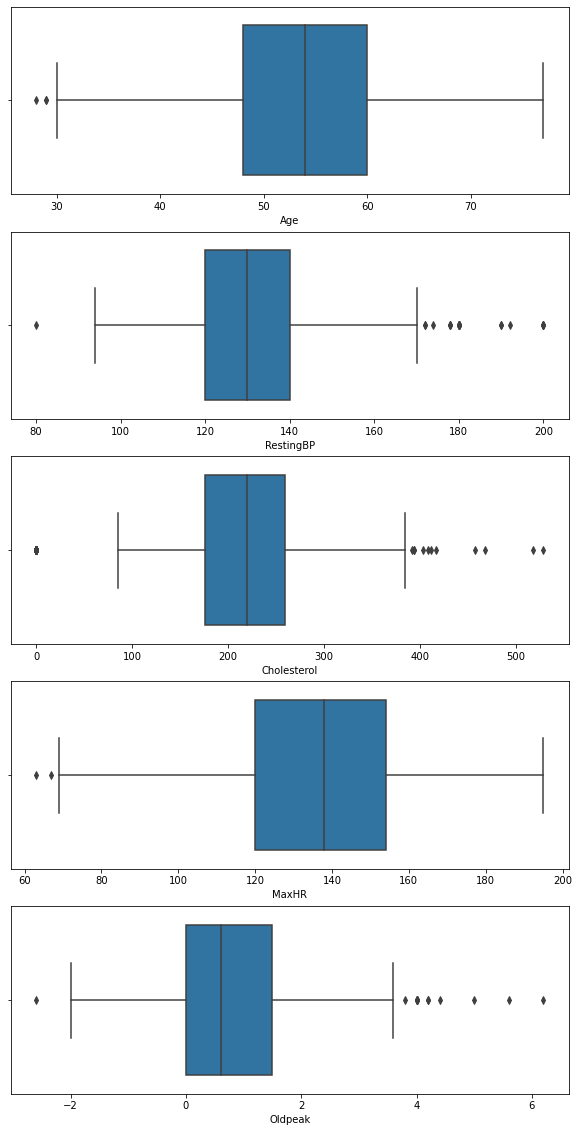

In [480]:
fig, ax = plt.subplots(5, 1, figsize=(10,20))
for i in range(len(df_numericas2.columns)):
    sns.boxplot(x=df_numericas2.columns[i], data=df_numericas2, ax=ax[i])
plt.show()

In [485]:
out_res = df_sin_null[df_sin_null["RestingBP"] >= 170]
out_res.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
86,M,ASY,1.0,Normal,Y,Flat,1.0,65.0,170.0,263.000000,112.000000,2.0
109,M,ATA,0.0,Normal,N,Up,0.0,39.0,190.0,241.000000,106.000000,0.0
132,M,ASY,0.0,ST,Y,Flat,1.0,56.0,170.0,207.498913,122.000000,2.0
189,M,ASY,0.0,ST,Y,Flat,1.0,53.0,180.0,285.000000,140.372558,1.5
190,M,ASY,0.0,ST,N,Up,0.0,46.0,180.0,280.000000,120.000000,0.0


In [489]:
out_chol = df_sin_null[(df_sin_null["Cholesterol"] <= 10) | (df_sin_null["Cholesterol"] >= 450)]
out_chol

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
28,F,ATA,0.0,Normal,N,Up,0.0,53.0,113.000000,468.0,127.000000,0.0
30,M,NAP,0.0,Normal,N,Flat,1.0,53.0,137.674946,518.0,130.000000,0.0
76,M,ASY,0.0,Normal,N,Flat,1.0,32.0,118.000000,529.0,175.602293,0.0
293,M,ASY,0.0,Normal,Y,Flat,1.0,65.0,115.000000,0.0,93.000000,0.0
294,M,ASY,0.0,Normal,N,Up,1.0,32.0,95.000000,0.0,127.000000,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...
508,M,ASY,1.0,Normal,N,Down,1.0,67.0,120.000000,0.0,150.000000,1.5
514,M,ASY,0.0,Normal,N,Up,1.0,43.0,122.000000,0.0,120.000000,0.5
515,M,NAP,1.0,ST,N,Flat,0.0,63.0,130.000000,0.0,160.000000,3.0
518,M,NAP,1.0,Normal,Y,Down,1.0,48.0,102.000000,0.0,110.000000,1.0


In [493]:
lista_chol = list(out_chol.index)

In [494]:
for i in lista_chol:
    df_sin_null.iloc[i, 9] = np.nan

In [499]:
df_numericas3 = df_sin_null.select_dtypes(include = np.number)

In [500]:
imputer = IterativeImputer()
imputer.fit(df_numericas3)
imputer.transform(df_numericas3)

array([[  0.        ,   1.        ,  49.        , ..., 180.        ,
        156.        ,   1.        ],
       [  0.        ,   0.        ,  37.        , ..., 283.        ,
         98.        ,   0.        ],
       [  0.        ,   0.        ,  54.        , ..., 195.        ,
        122.        ,   0.        ],
       ...,
       [  0.        ,   1.        ,  57.        , ..., 131.        ,
        115.        ,   1.2       ],
       [  0.        ,   1.        ,  57.        , ..., 236.        ,
        174.        ,   0.        ],
       [  0.        ,   0.        ,  48.21502774, ..., 175.        ,
        173.        ,   0.        ]])

In [501]:
numericas_trans2 = pd.DataFrame(imputer.transform(df_numericas3), columns = df_numericas3.columns)
numericas_trans2.head()

,FastingBS,HeartDisease,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,0.0,1.0,49.0,160.0,180.000000,156.0,1.0
1,0.0,0.0,37.0,130.0,283.000000,98.0,0.0
2,0.0,0.0,54.0,150.0,195.000000,122.0,0.0
3,0.0,0.0,39.0,120.0,230.735027,170.0,0.0
4,0.0,0.0,45.0,130.0,237.000000,170.0,0.0


In [486]:
df_col = df_numericas2.columns

In [ ]:
indices_out = detectar_outliers(df_col,df)
indices_out

{'Age': [170, 208, 219, 829],
 'RestingBP': [109,
  123,
  189,
  190,
  241,
  274,
  275,
  314,
  365,
  399,
  411,
  423,
  449,
  475,
  550,
  585,
  592,
  673,
  702,
  725,
  732,
  759,
  774,
  780,
  855,
  880],
 'Cholesterol': [28,
  30,
  69,
  76,
  102,
  123,
  149,
  182,
  250,
  256,
  293,
  294,
  295,
  296,
  297,
  299,
  300,
  302,
  303,
  305,
  306,
  307,
  308,
  309,
  312,
  313,
  314,
  315,
  316,
  318,
  319,
  320,
  322,
  323,
  324,
  325,
  326,
  327,
  328,
  329,
  330,
  332,
  334,
  335,
  336,
  337,
  338,
  340,
  341,
  342,
  343,
  344,
  345,
  346,
  347,
  348,
  349,
  350,
  351,
  352,
  353,
  354,
  355,
  356,
  357,
  358,
  360,
  361,
  362,
  363,
  364,
  365,
  367,
  369,
  370,
  371,
  372,
  373,
  374,
  375,
  376,
  377,
  378,
  379,
  380,
  382,
  383,
  384,
  385,
  386,
  387,
  388,
  389,
  391,
  392,
  393,
  394,
  395,
  396,
  397,
  398,
  399,
  400,
  401,
  403,
  404,
  405,
  406,
  407,


In [ ]:
filas = []
for columna, indices in indices_out.items():
    for indice in indices:
        filas.append(indice)

In [ ]:
df_outliers = df.iloc[filas]

In [ ]:
df_outliers.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
170,M,ATA,0.0,Normal,N,Up,0.0,29.0,120.0,224.864990,160.000000,0.000000
208,NaN,ATA,0.0,LVH,N,Up,0.0,28.0,130.0,235.601366,164.586588,0.197255
219,M,ATA,0.0,Normal,N,Up,0.0,29.0,140.0,263.000000,170.000000,0.273024
829,M,ATA,0.0,LVH,N,Up,NaN,29.0,130.0,204.000000,202.000000,0.000000
109,M,ATA,0.0,Normal,N,Up,0.0,39.0,190.0,241.000000,106.000000,0.000000


In [ ]:
df_outliers["HeartDisease"].value_counts()

1.0    165
0.0     36
Name: HeartDisease, dtype: int64

Encoding

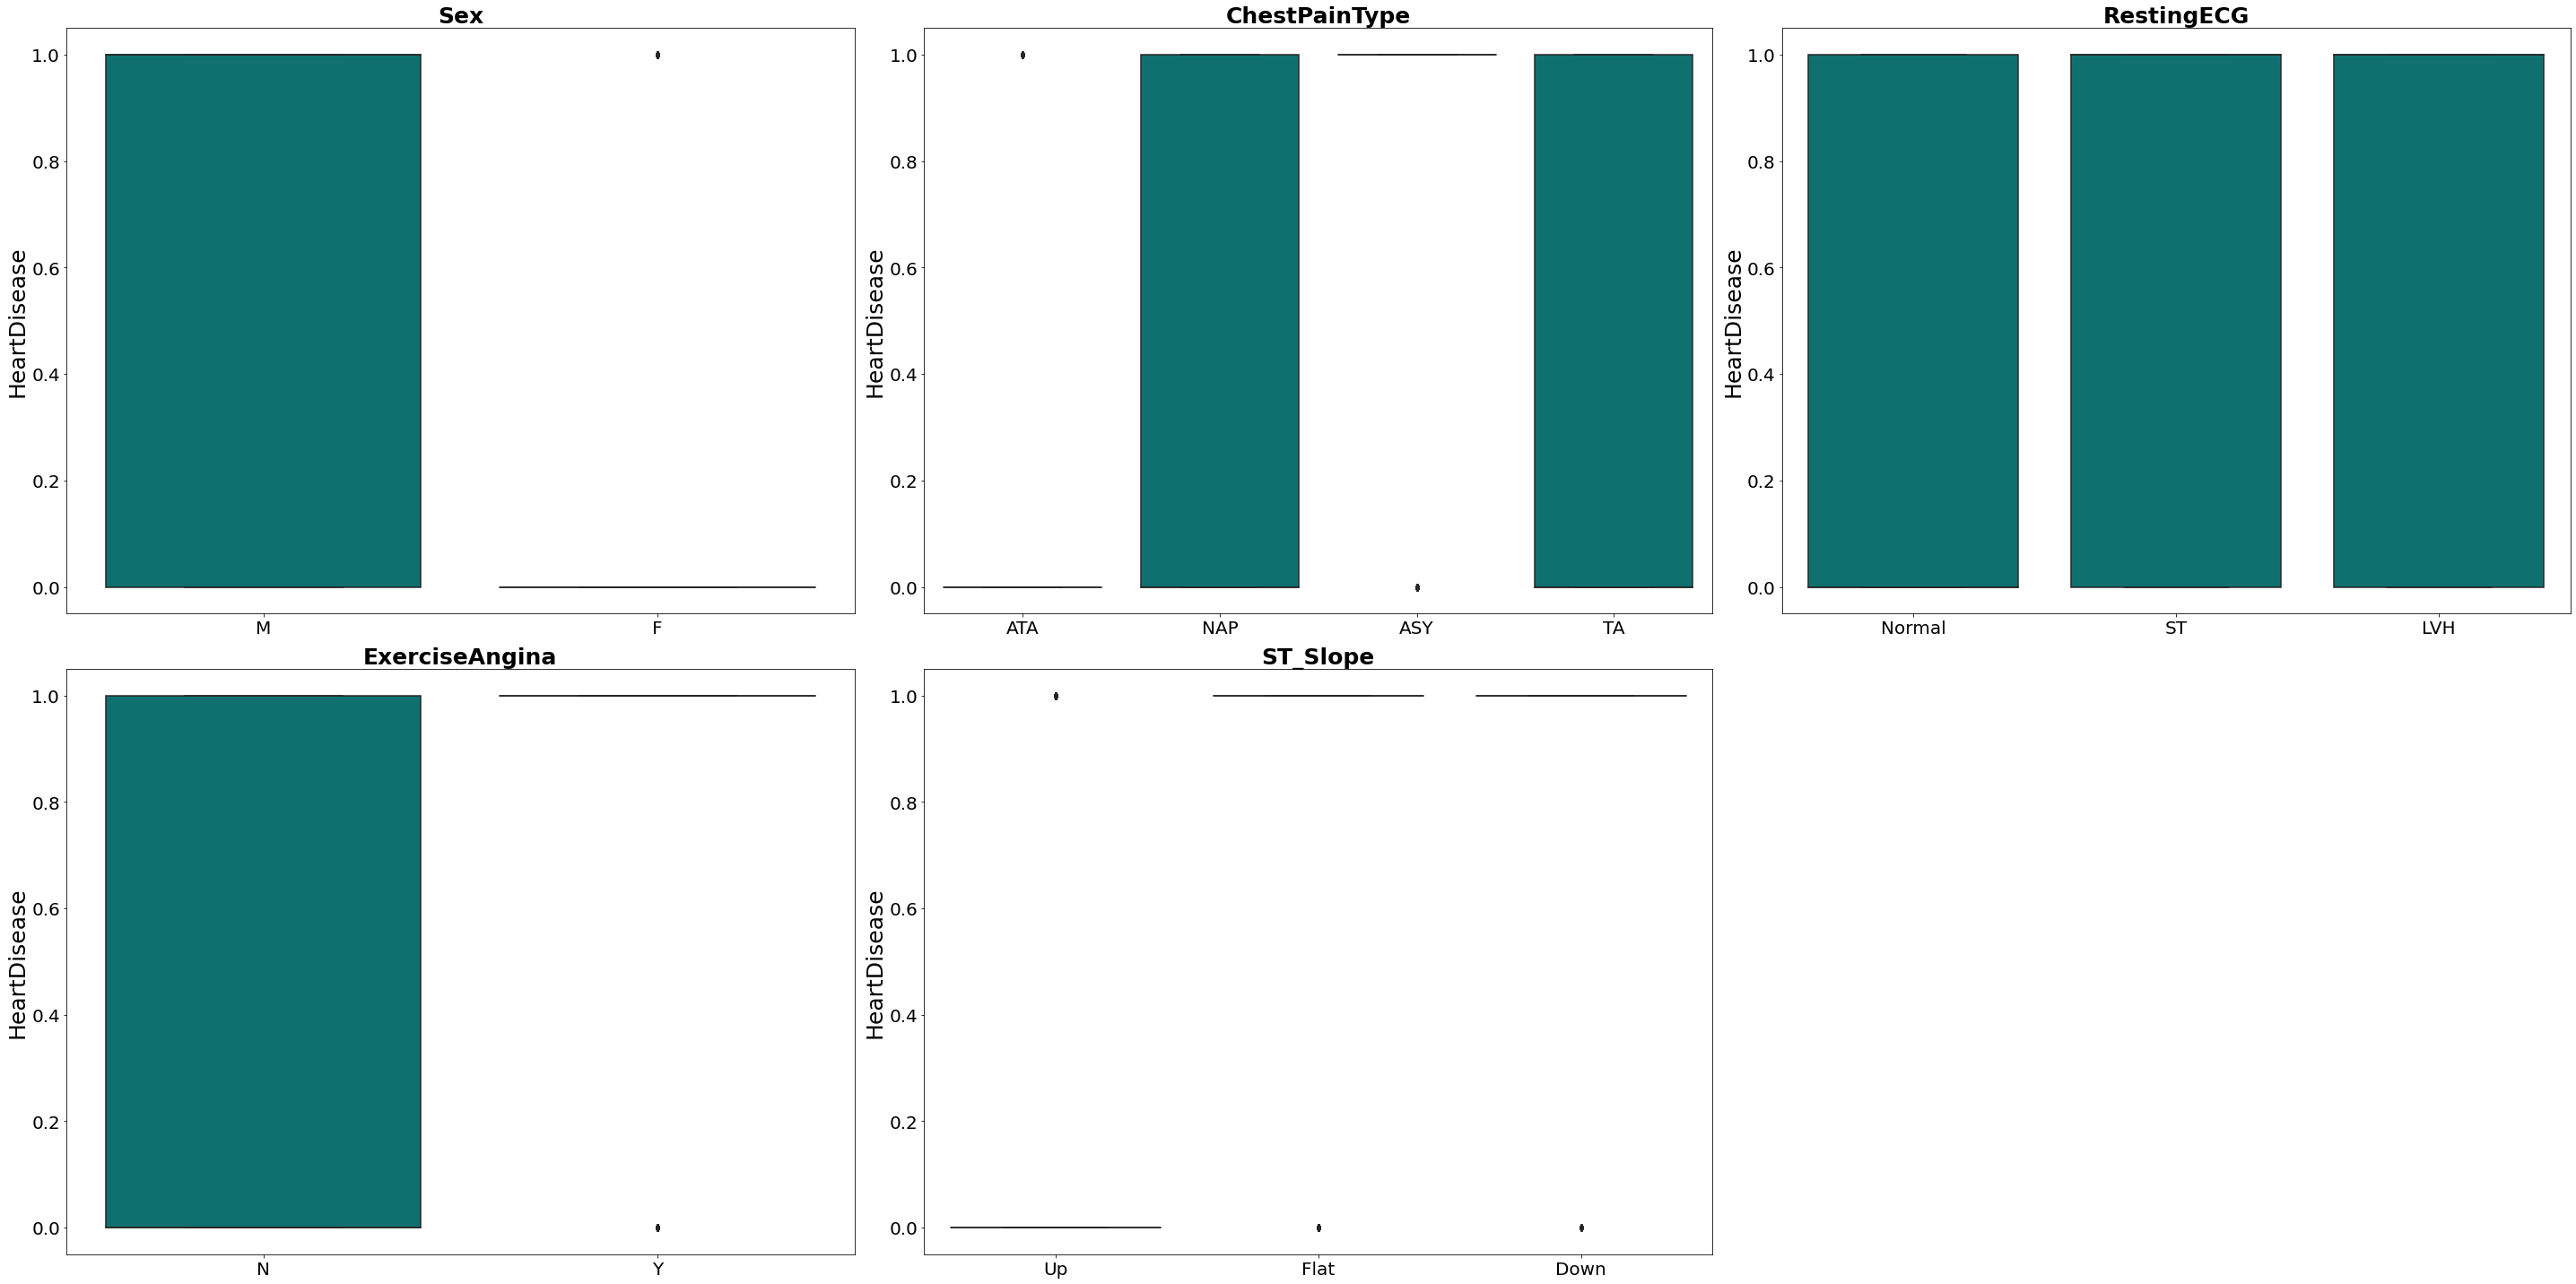

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (40, 20))


axes = axes.flat

columnas_cat = df.select_dtypes(include = ["object", "category"]).columns

for i, colum in enumerate(columnas_cat): 
    sns.boxplot(
        data = df,
        x = colum,
        y = "HeartDisease",
        color = "teal", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "HeartDisease", fontsize = 25)

fig.delaxes(axes[-1])

fig.tight_layout();